In [1]:
import torch
import matplotlib.pyplot as plt

from shmex.local import localify
figures_dir = localify('FIGURES_DIR')

Here's the wiggle:

$$
\text{wiggle}(x, \beta) = \beta \cdot 
\begin{cases}
x - 1 & \text{if } x < 1, \\
\log(x) & \text{if } x \geq 1,
\end{cases}
$$

And exponentiated:

$$
\exp(\text{wiggle}(x, \beta)) = 
\begin{cases}
e^{\beta (x - 1)} & \text{if } x < 1, \\
x^{\beta} & \text{if } x \geq 1.
\end{cases}
$$

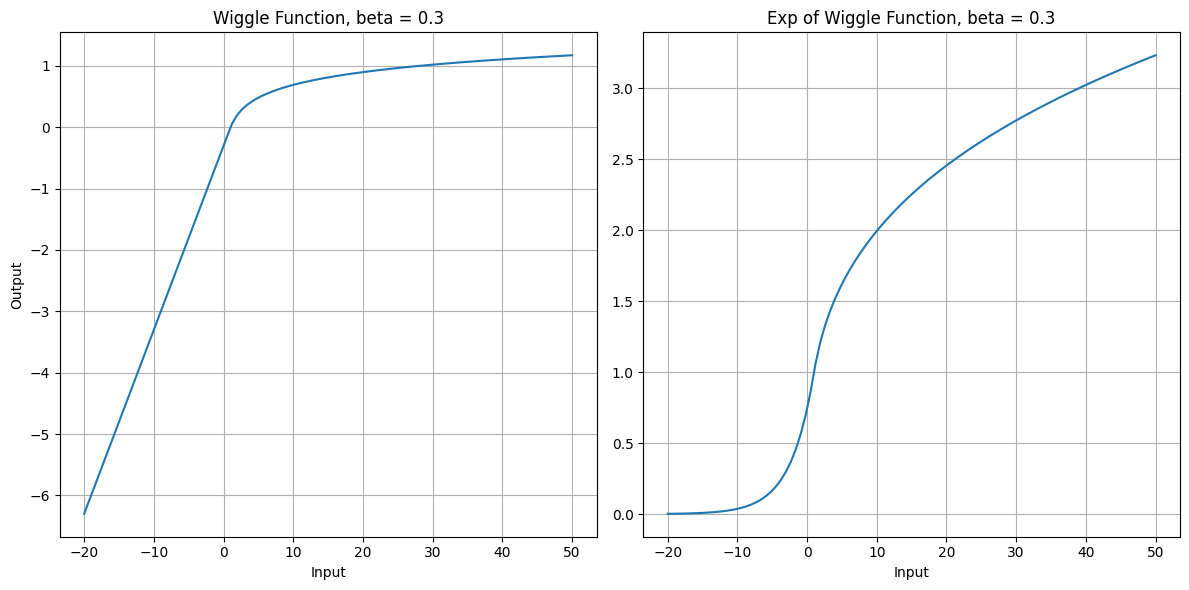

In [2]:
beta = 0.3

def wiggle(x, beta):
    return beta * torch.where(x < 1, x - 1, torch.log(x))

# Prepare data for plotting
x = torch.linspace(-20, 50, 100)
y = torch.exp(wiggle(x, beta))
y_no_exp = wiggle(x, beta)

# Create a figure with two side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot without exp (left)
ax1.plot(x.detach().numpy(), y_no_exp.detach().numpy())
ax1.set_xlabel('Input')
ax1.set_ylabel('Output')
ax1.set_title(f'Wiggle Function, beta = {beta}')
ax1.grid(True)

# Plot with exp (right)
ax2.plot(x.detach().numpy(), y.detach().numpy())
ax2.set_xlabel('Input')
ax2.set_ylabel('')
ax2.set_title(f'Exp of Wiggle Function, beta = {beta}')
ax2.grid(True)

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

fig.savefig(figures_dir + 'wiggle_activation_function.svg')